In [ ]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta


from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [ ]:
data = pd.read_csv(r'/content/Walmart.csv.xls')

Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


All data types are ok.

In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


There is no null value in the data set.

In [ ]:
data.nunique()

,0
Store,45
Date,143
Weekly_Sales,6435
Holiday_Flag,2
Temperature,3528
Fuel_Price,892
CPI,2145
Unemployment,349


In [ ]:
data['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
0,5985
1,450


There is no null value in the data. Holiday_Sales ha two value and store ha 45 value. The data overall is not normalize. 450 weeks has holiday but 5985 have no holiday.

Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


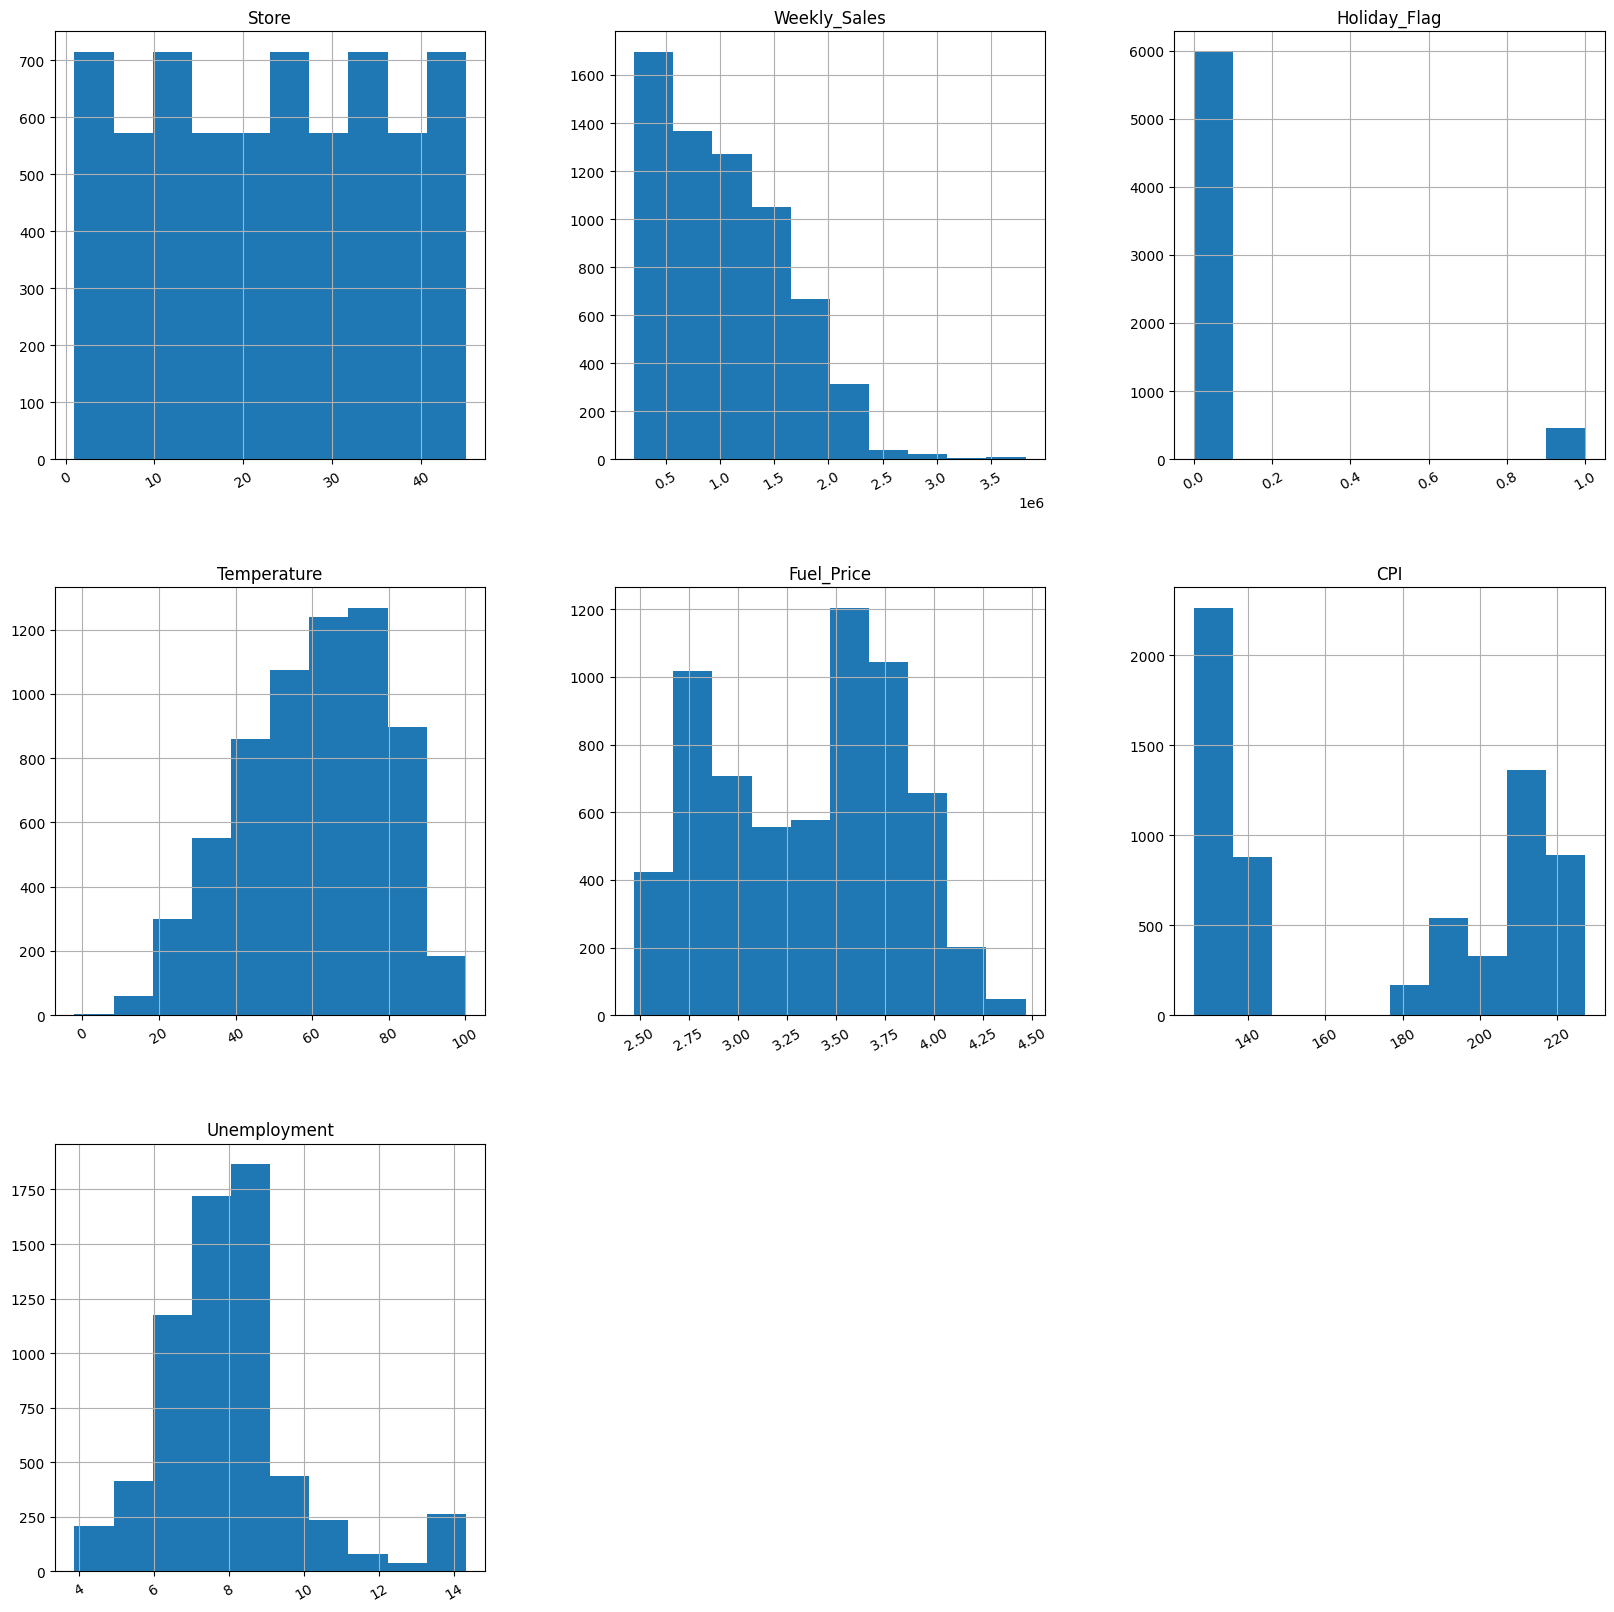

In [ ]:
#Show all distributions of all the features in the dataset except Country, Income, Education, Martial_Status
data.hist(figsize=(20,20), xrot = 30)
plt.show()

In [ ]:
data.Date = pd.to_datetime(data['Date'], format = 'mixed')

In [ ]:
correlation = data.corr()
correlation['Weekly_Sales']

,Weekly_Sales
Store,-0.335332
Date,0.004592
Weekly_Sales,1.000000
Holiday_Flag,0.036891
Temperature,-0.063810
Fuel_Price,0.009464
CPI,-0.072634
Unemployment,-0.106176


Holiday_Flag might have a minor positive impact on sales, but the effect is weak.

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

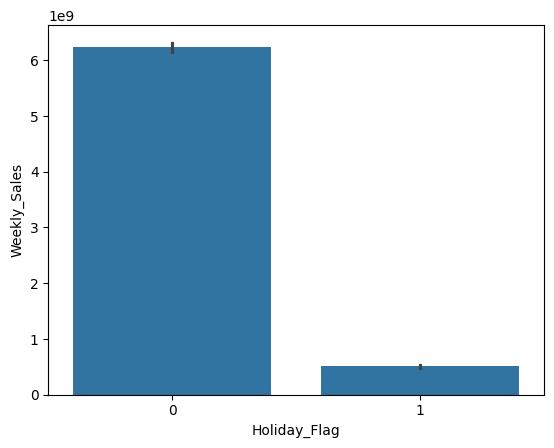

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data, estimator= np.sum)

In [ ]:
data_holiday = data.loc[data['Holiday_Flag']==1]
data_holiday['Date'].unique()

<DatetimeArray>
['2010-12-02 00:00:00', '2010-10-09 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-11-02 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-10-02 00:00:00',
 '2012-07-09 00:00:00']
Length: 10, dtype: datetime64[ns]

In [ ]:
data_not_holiday = data.loc[data['Holiday_Flag']==0]
data_not_holiday['Date'].unique()

<DatetimeArray>
['2010-05-02 00:00:00', '2010-02-19 00:00:00', '2010-02-26 00:00:00',
 '2010-05-03 00:00:00', '2010-12-03 00:00:00', '2010-03-19 00:00:00',
 '2010-03-26 00:00:00', '2010-02-04 00:00:00', '2010-09-04 00:00:00',
 '2010-04-16 00:00:00',
 ...
 '2012-08-17 00:00:00', '2012-08-24 00:00:00', '2012-08-31 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-05-10 00:00:00', '2012-12-10 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 133, dtype: datetime64[ns]

All holidays are not in the data. There are 4 holiday values.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [ ]:
# Super bowl dates
data.loc[(data['Date'] == '12-02-2010')|(data['Date'] == '11-02-2011')|(data['Date'] == '10-02-2012'),'Super_Bowl'] = True
data.loc[(data['Date'] != '12-02-2010')&(data['Date'] != '11-02-2011')&(data['Date'] != '10-02-2012'),'Super_Bowl'] = False

In [ ]:
# Labor day dates
data.loc[(data['Date'] == '10-09-2010')|(data['Date'] == '09-09-2011')|(data['Date'] == '07-09-2012'),'Labor_Day'] = True
data.loc[(data['Date'] != '10-09-2010')&(data['Date'] != '09-09-2011')&(data['Date'] != '07-09-2012'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates
data.loc[(data['Date'] == '26-11-2010')|(data['Date'] == '25-11-2011'),'Thanksgiving'] = True
data.loc[(data['Date'] != '26-11-2010')&(data['Date'] != '22-11-2011'),'Thanksgiving'] = False

In [ ]:
#Christmas dates
data.loc[(data['Date'] == '31-12-2010')|(data['Date'] == '30-12-2011'),'Christmas'] = True
data.loc[(data['Date'] != '31-12-2010')&(data['Date'] != '30-12-2011'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

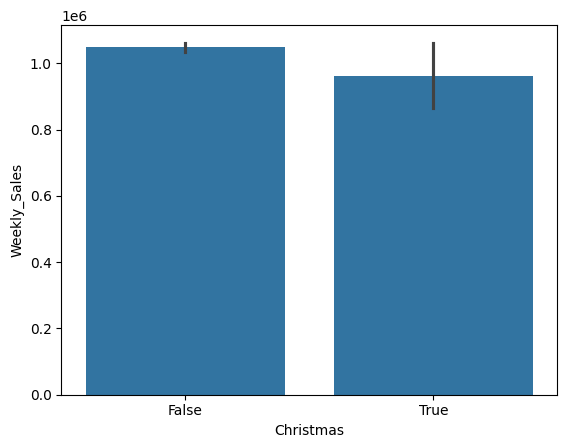

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

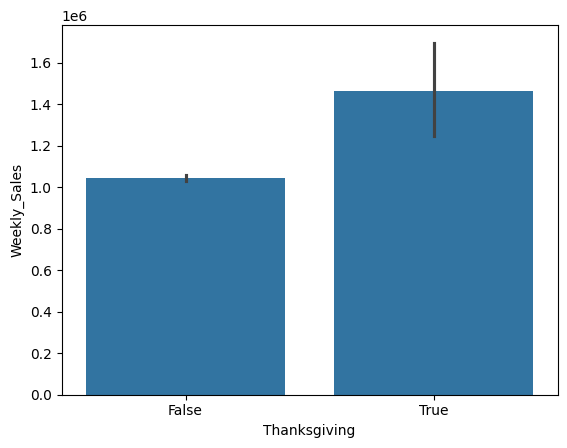

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

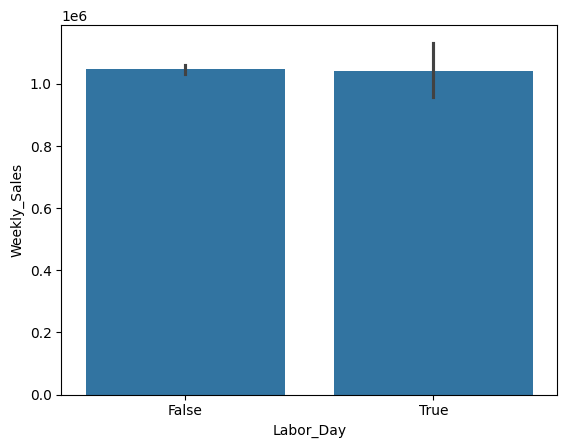

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data) # Labor day holiday vs not-labor day

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

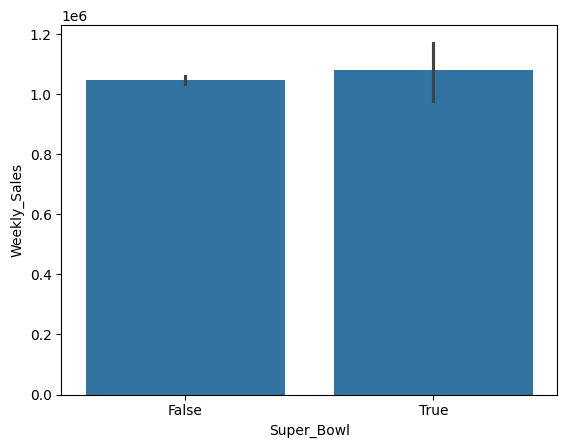

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data) # Super bowl holiday vs not-super bowl

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

In [ ]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


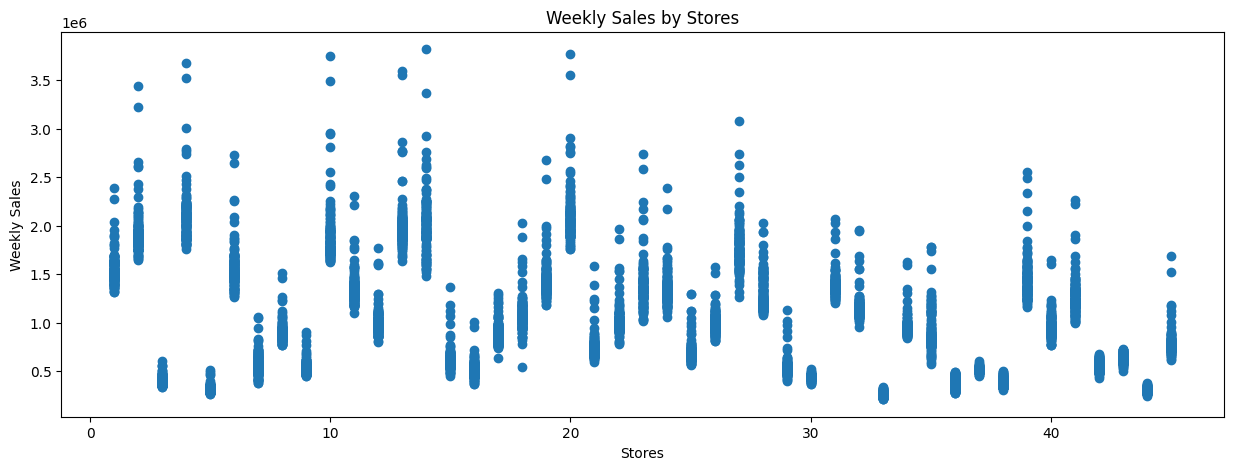

In [ ]:
x = data['Store']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

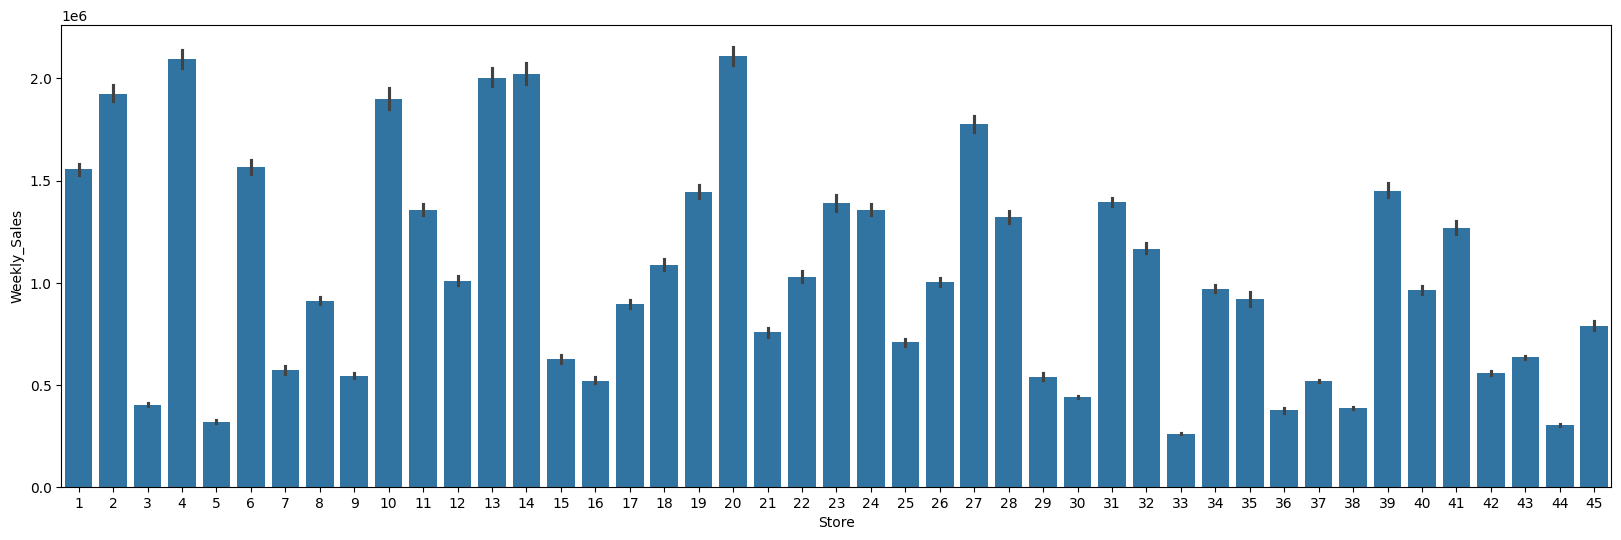

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data, estimator=np.mean)

Feature **Engineering**

In [ ]:
# Feature engineering
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month

data['Week'] = data['Date'].dt.isocalendar().week

data['DayOfWeek'] = data['Date'].dt.dayofweek

data['Is_Weekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

data['Fuel_CPI_Ratio'] = data['Fuel_Price'] / data['CPI']


In [ ]:
data.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


<Axes: xlabel='Month'>

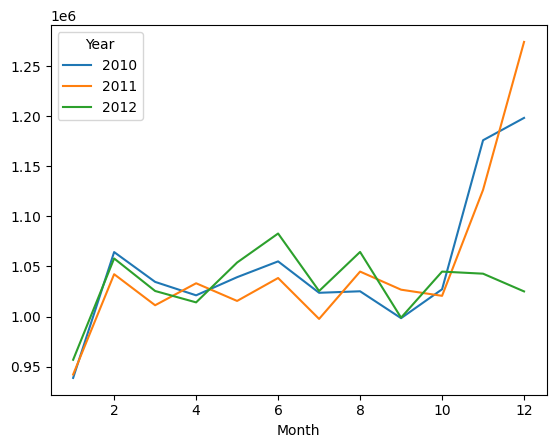

In [ ]:
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

In [ ]:
data.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False)

,Weekly_Sales
Week,
51,1.754774e+06
47,1.471273e+06
50,1.244704e+06
23,1.133040e+06
7,1.090298e+06
5,1.082980e+06
14,1.081253e+06
10,1.071031e+06
27,1.063499e+06


<Axes: xlabel='Week'>

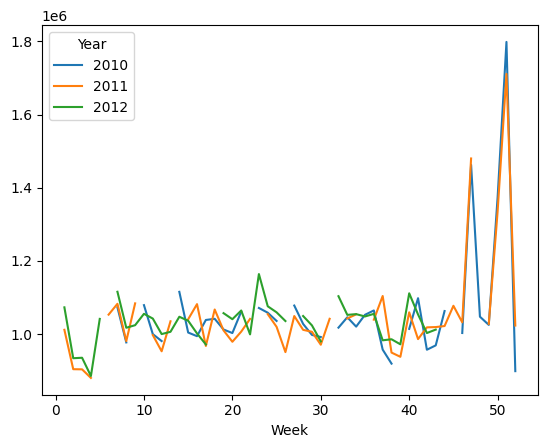

In [ ]:
weekly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

Effect of Other Features

<Axes: xlabel='Fuel_Price'>

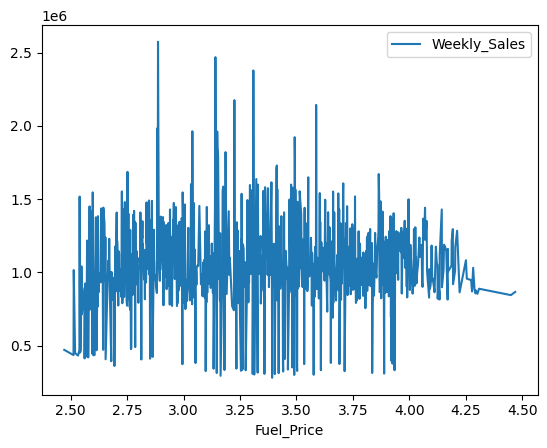

In [ ]:
fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

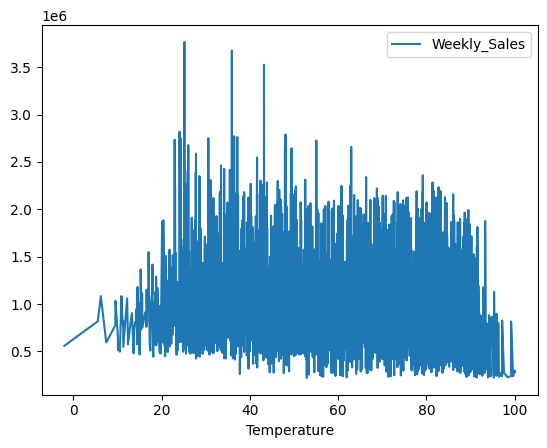

In [ ]:
temp = pd.pivot_table(data, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

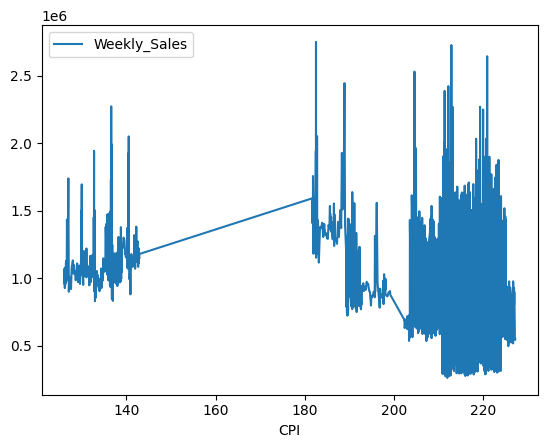

In [ ]:
CPI = pd.pivot_table(data, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

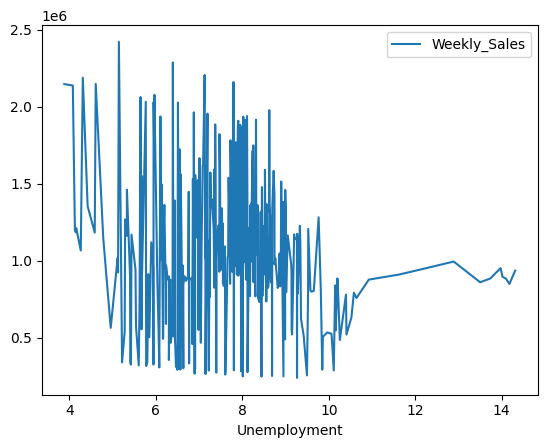

In [ ]:
unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

<Axes: xlabel='Fuel_CPI_Ratio'>

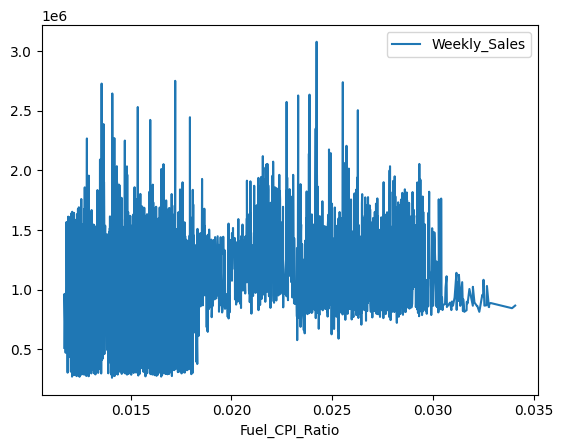

In [ ]:
unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_CPI_Ratio")
unemployment.plot()

CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.
This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and another important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.



**Encoding and normalizing**

In [ ]:
# One-hot encode Store
data = pd.get_dummies(data, columns=['Store'], prefix='Store', drop_first=True)

**Applying Models**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

# Preparing features and target variable
X = data.drop(columns=['Weekly_Sales', 'Date', 'Super_Bowl', 'Fuel_Price', 'CPI', 'Labor_Day', 'Thanksgiving', 'Christmas'])  # Exclude target and original date
y = data['Weekly_Sales']

# Initialize models
linear_regression_model = LinearRegression()

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


# Initializing the KFold and scoring methods

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scorer = 'r2'

mae_scorer = make_scorer(mean_absolute_error)

rmse_scorer = make_scorer(mean_squared_error, squared=False)


# Linear Regression
r2_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=r2_scorer).mean()
mae_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Random Forest
r2_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=r2_scorer).mean()
mae_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Display the results
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_linear, r2_rf],
    'MAE': [mae_linear, mae_rf],
    'RMSE': [rmse_linear, rmse_rf]
}

results_data = pd.DataFrame(results)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
print (results_data)

               Model  R2 Score           MAE           RMSE
0  Linear Regression  0.923413  95084.622716  156099.408018
1      Random Forest  0.948044  67510.963625  128519.501055
